In [216]:
import pandas as pd
#Tirar seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [217]:
df = pd.read_csv('pnad.csv', encoding='ISO-8859-1')

In [218]:
df.head(10)

,Unnamed: 0,Ano,Trimestre,UF,UPA,Estrato,V1008,V1014,V1027,V1029,...,V4005,VD3004,VD4001,VD4002,VD4019,VD4020,VD4031,VD4035,Habitual,Efetivo
0,1,2019,4,11,110000016,1110011,1,7,98.756636,532471,...,NaN,5.0,1.0,1.0,2100.0,2100.0,36.0,30.0,1.050059,1.0598
1,2,2019,4,11,110000016,1110011,1,7,98.756636,532471,...,2.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,1.050059,1.0598
2,3,2019,4,11,110000016,1110011,1,7,98.756636,532471,...,2.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,1.050059,1.0598
3,4,2019,4,11,110000016,1110011,1,7,98.756636,532471,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.050059,1.0598
4,5,2019,4,11,110000016,1110011,3,7,98.756636,532471,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.050059,1.0598
5,6,2019,4,11,110000016,1110011,3,7,98.756636,532471,...,NaN,5.0,1.0,1.0,1000.0,1000.0,44.0,38.0,1.050059,1.0598
6,7,2019,4,11,110000016,1110011,3,7,98.756636,532471,...,2.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,1.050059,1.0598
7,8,2019,4,11,110000016,1110011,3,7,98.756636,532471,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.050059,1.0598
8,9,2019,4,11,110000016,1110011,3,7,98.756636,532471,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.050059,1.0598
9,10,2019,4,11,110000016,1110011,4,7,98.756636,532471,...,NaN,5.0,1.0,1.0,2500.0,2500.0,48.0,42.0,1.050059,1.0598


## Iniciando

conferindo as informações

In [219]:
print(df[(df['V2008']==99)].shape[0])
print(df[(df['V2008']!=99)].shape[0])


56574
821794


##### Processo de separação das informações de interesse 2019
1. Pegando as pessoas do ano de 2019 no 4º trimestre
2. Retirnado pessoas gemeas da base
3. reiniciando o indice e retirando coluna desnecessária

In [107]:
people_2019_4 = df[(df['Ano']==2019) & (df['Trimestre']==4) & (df['VD4002']==1) & (df['V2008']!=99)]
people_2019_4 = people_2019_4.drop_duplicates(subset=['V1008','V2008','V20081','V20082','V2007'],keep=False)
people_2019_4 = people_2019_4.reset_index()
people_2019_4.drop(columns=['Unnamed: 0'])

,index,Ano,Trimestre,UF,UPA,Estrato,V1008,V1014,V1027,V1029,...,V4005,VD3004,VD4001,VD4002,VD4019,VD4020,VD4031,VD4035,Habitual,Efetivo
0,0,2019,4,11,110000016,1110011,1,7,98.756636,532471,...,NaN,5.0,1.0,1.0,2100.0,2100.0,36.0,30.0,1.050059,1.059800
1,5,2019,4,11,110000016,1110011,3,7,98.756636,532471,...,NaN,5.0,1.0,1.0,1000.0,1000.0,44.0,38.0,1.050059,1.059800
2,9,2019,4,11,110000016,1110011,4,7,98.756636,532471,...,NaN,5.0,1.0,1.0,2500.0,2500.0,48.0,42.0,1.050059,1.059800
3,15,2019,4,11,110000016,1110011,5,7,98.756636,532471,...,NaN,5.0,1.0,1.0,2000.0,2000.0,44.0,38.0,1.050059,1.059800
4,24,2019,4,11,110000016,1110011,8,7,98.756636,532471,...,NaN,7.0,1.0,1.0,1600.0,1600.0,40.0,34.0,1.050059,1.059800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140255,542784,2019,4,53,530044434,5310220,9,8,374.448529,3027352,...,NaN,5.0,1.0,1.0,998.0,998.0,35.0,35.0,1.037559,1.044198
140256,542785,2019,4,53,530044434,5310220,9,8,374.448529,3027352,...,NaN,5.0,1.0,1.0,2300.0,2300.0,36.0,36.0,1.037559,1.044198
140257,542786,2019,4,53,530044434,5310220,9,8,374.448529,3027352,...,NaN,5.0,1.0,1.0,998.0,998.0,45.0,45.0,1.037559,1.044198
140258,542794,2019,4,53,530044434,5310220,13,8,374.448529,3027352,...,NaN,2.0,1.0,1.0,2000.0,2000.0,40.0,40.0,1.037559,1.044198


##### Processo de separação das informações de interesse 2020
1. Pegando as pessoas do ano de 2019 no 4º trimestre
2. Retirnado pessoas gemeas da base
3. reiniciando o indice e retirando coluna desnecessária

In [108]:
people_2020_4 = df[(df['Ano']==2020) & (df['Trimestre']==4) & (df['VD4002']==1) & (df['V2008']!=99)]
people_2020_4 = people_2020_4.drop_duplicates(subset=['V1008','V2008','V20081','V20082','V2007'],keep=False)
people_2020_4 = people_2020_4.reset_index()
people_2020_4.drop(columns=['Unnamed: 0'])

,index,Ano,Trimestre,UF,UPA,Estrato,V1008,V1014,V1027,V1029,...,V4005,VD3004,VD4001,VD4002,VD4019,VD4020,VD4031,VD4035,Habitual,Efetivo
0,542802,2020,4,11,110000016,1110011,1,8,83.402248,542168,...,NaN,2.0,1.0,1.0,1045.0,1045.0,40.0,40.0,1.0,1.010798
1,542803,2020,4,11,110000016,1110011,1,8,83.402248,542168,...,NaN,4.0,1.0,1.0,1045.0,1045.0,40.0,40.0,1.0,1.010798
2,542814,2020,4,11,110000016,1110011,4,8,83.402248,542168,...,NaN,5.0,1.0,1.0,1600.0,1600.0,40.0,40.0,1.0,1.010798
3,542815,2020,4,11,110000016,1110011,4,8,83.402248,542168,...,NaN,5.0,1.0,1.0,NaN,NaN,36.0,36.0,1.0,1.010798
4,542816,2020,4,11,110000016,1110011,4,8,83.402248,542168,...,NaN,6.0,1.0,1.0,1045.0,1045.0,48.0,48.0,1.0,1.010798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94915,878362,2020,4,53,530057544,5310220,6,8,91.916096,3066931,...,NaN,3.0,1.0,1.0,750.0,750.0,25.0,25.0,1.0,1.008278
94916,878363,2020,4,53,530057544,5310220,12,8,91.916096,3066931,...,NaN,2.0,1.0,1.0,1200.0,1200.0,44.0,44.0,1.0,1.008278
94917,878364,2020,4,53,530057544,5310220,12,8,91.916096,3066931,...,NaN,5.0,1.0,1.0,1000.0,1000.0,44.0,44.0,1.0,1.008278
94918,878365,2020,4,53,530057544,5310220,13,8,91.916096,3066931,...,NaN,2.0,1.0,1.0,1045.0,1045.0,35.0,35.0,1.0,1.008278


In [85]:
print(100-((len(people_2020_4)/len(people_2019_4))*100))

32.32568087836874


Nesse ponto verificamos a porcentagem de aumento de desemprego da base, comparando os numeros de 2019 e 2020, 
verificamos que **32.36% das pessoas empregadas em 2019, perderam seus postos de trabalho.** 

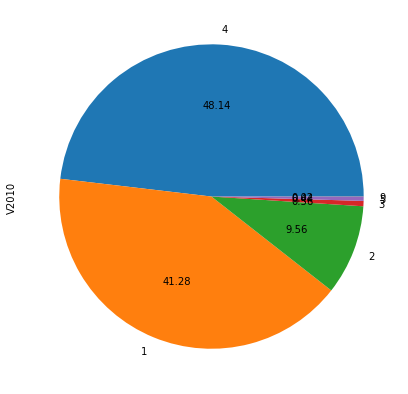

In [118]:
people_2019_4['V2010'].value_counts().plot(kind='pie',figsize=(15,7),autopct="%.2f")

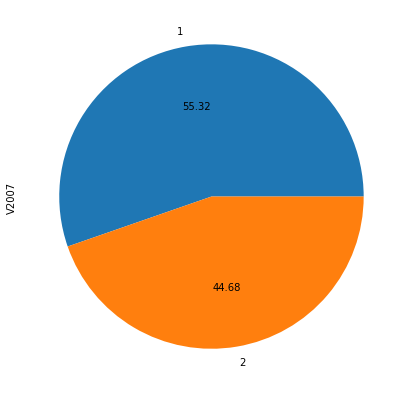

In [120]:
people_2019_4['V2007'].value_counts().plot(kind='pie',figsize=(15,7),autopct="%.2f")

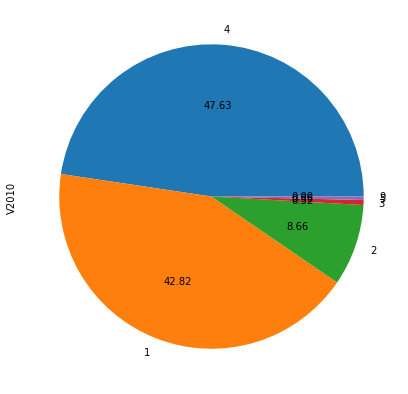

In [119]:
people_2020_4['V2010'].value_counts().plot(kind='pie',figsize=(15,7),autopct="%.2f")

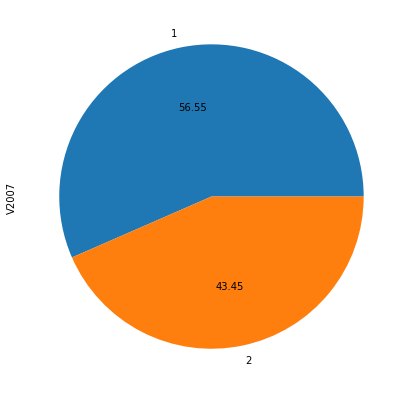

In [121]:
people_2020_4['V2007'].value_counts().plot(kind='pie',figsize=(15,7),autopct="%.2f")

In [131]:
people_2019_4['VD3004'].value_counts().sort_index(ascending=False)

7.0    25494
6.0     7901
5.0    43681
4.0     9458
3.0    11593
2.0    38112
1.0     4021
Name: VD3004, dtype: int64

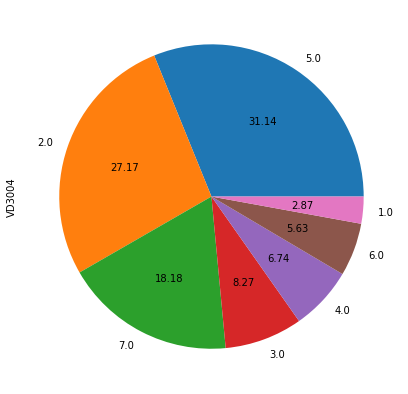

In [123]:
people_2019_4['VD3004'].value_counts().plot(kind='pie',figsize=(15,7),autopct="%.2f")

In [130]:
people_2020_4['VD3004'].value_counts().sort_index(ascending=False)

7.0    20333
6.0     5805
5.0    30035
4.0     6092
3.0     7475
2.0    22919
1.0     2261
Name: VD3004, dtype: int64

In [161]:
score = people_2019_4['VD3004'].value_counts().sort_index(ascending=False).to_frame()
score=score.rename(columns={'VD3004':'2019'})

score['2020']=people_2020_4['VD3004'].value_counts().sort_index(ascending=False).values

100-((len(people_2020_4)/len(people_2019_4))*100)

score['unemployed_tax'] = 100-((score['2020']/score['2019'])*100)

In [163]:
score

,2019,2020,unemployed_tax
7.0,25494,20333,20.243979
6.0,7901,5805,26.528288
5.0,43681,30035,31.240127
4.0,9458,6092,35.588919
3.0,11593,7475,35.521435
2.0,38112,22919,39.864085
1.0,4021,2261,43.770206


O que podemos concluir?

In [157]:
people_2019_4['VD3004'].value_counts().sort_index(ascending=False).values

array([25494,  7901, 43681,  9458, 11593, 38112,  4021], dtype=int64)

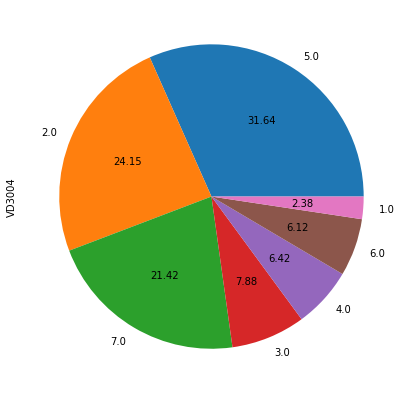

In [122]:
people_2020_4['VD3004'].value_counts().plot(kind='pie',figsize=(15,7),autopct="%.2f")

In [213]:
occuped_withdrawn_2020 = df[(df['Ano']==2020) & (df['Trimestre']==4) & (df['VD4002']==1) & (df['V2008']!=99) & (df['V4005']==1)]

occuped_2020 = df[(df['Ano']==2020) & (df['Trimestre']==4) & (df['VD4002']==1) & (df['V2008']!=99) & (df['V4005']!=1)]

occuped_withdrawn_2019 = df[(df['Ano']==2019) & (df['Trimestre']==4) & (df['VD4002']==1) & (df['V2008']!=99) & (df['V4005']==1)]

occuped_2019 = df[(df['Ano']==2019) & (df['Trimestre']==4) & (df['VD4002']==1) & (df['V2008']!=99) & (df['V4005']!=1)]

In [169]:
test= df[(df['Ano']==2020) & (df['Trimestre']==4) & (df['VD4002']==1) & (df['V2008']!=99)]

In [199]:
df['Habitual'].value_counts()

1.000000    335566
1.048046     59297
1.050059     44713
1.041767     42568
1.044859     39953
1.036248     38547
1.052418     36744
1.037368     32873
1.038334     28878
1.054225     28481
1.036414     28244
1.042216     26634
1.051426     22004
1.045611     20270
1.049605     19886
1.042128     18053
1.045129     13155
1.066410     11825
1.041690     10442
1.054520     10386
1.037559      9849
Name: Habitual, dtype: int64

In [200]:
df['Efetivo'].value_counts()

1.053216    59297
1.059800    44713
1.047955    42568
1.050682    39953
1.041907    38547
1.060009    36744
1.011885    33510
1.009652    33435
1.043317    32873
1.044706    28878
1.059640    28481
1.010798    28456
1.041970    28244
1.047691    26634
1.010087    25919
1.014350    22685
1.055043    22004
1.009683    21526
1.050964    20270
1.059898    19886
1.010940    19645
1.049705    18053
1.010934    17840
1.010290    16213
1.008464    15990
1.010923    15907
1.009277    14952
1.052474    13155
1.010599    11959
1.074529    11825
1.011627    11564
1.010996    11515
1.046097    10442
1.058677    10386
1.044198     9849
1.010322     8987
1.010996     7295
1.008278     6376
1.012804     6315
1.007326     5477
Name: Efetivo, dtype: int64

surerir utilizar a renda, mas indicar o pq pode ser problematico. 

In [212]:

print(occuped_2020["VD4020"].median())
occuped_2020["VD4020"].describe()



1400.0


count    114461.000000
mean       2266.767502
std        3728.760955
min           0.000000
25%        1000.000000
50%        1400.000000
75%        2500.000000
max      300000.000000
Name: VD4020, dtype: float64

In [214]:
print(occuped_2019["VD4020"].median())
occuped_2019["VD4020"].describe()


1300.0


count    205812.000000
mean       2145.073154
std        3520.881995
min           0.000000
25%         900.000000
50%        1300.000000
75%        2250.000000
max      300000.000000
Name: VD4020, dtype: float64

In [211]:
print(occuped_withdrawn_2020["VD4020"].median())
occuped_withdrawn_2020["VD4020"].describe()

1300.0


count     3291.000000
mean      2216.386509
std       3327.659396
min          0.000000
25%       1000.000000
50%       1300.000000
75%       2400.000000
max      82000.000000
Name: VD4020, dtype: float64

In [215]:
print(occuped_withdrawn_2019["VD4020"].median())
occuped_withdrawn_2019["VD4020"].describe()


1500.0


count     4985.000000
mean      2601.153862
std       4081.476695
min          0.000000
25%        998.000000
50%       1500.000000
75%       3000.000000
max      70000.000000
Name: VD4020, dtype: float64

comentar essas coisas curiosas